In [1]:
import h5py    
import numpy as np  
import bluepysnap
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist.axislines import Axes
import bluepysnap
from bluepysnap import Simulation as snap_sim
from pathlib import Path
import seaborn as sns
import matplotlib.patches as patches
# Importing Pandas to create DataFrame
import pandas as pd

In [2]:
color_layer= {1:'#1BE7FF',2:'#60992D',3: '#FED766',4: '#D76A03', 5: '#922D50',6: '#B0A3D4'}

In [3]:
color_exc = 'red'
color_inh = 'tab:blue'

In [4]:
color_ndam ='#009FFD'
color_met = '#FFA400'
color_aged = 'm'

c_pal = 'bwr'
# Define a palette for the age groups
age_palette = {'Young': '#FFA400', 'Aged': 'm'}

In [5]:
# Data obtained with Code4DataExtraction/Fig6a_dataextraction.ipynb
# Data Folder can be downloaded from 10.5281/zenodo.14187063
df = pd.read_csv('Data/ATP_difference_young_aged.csv')

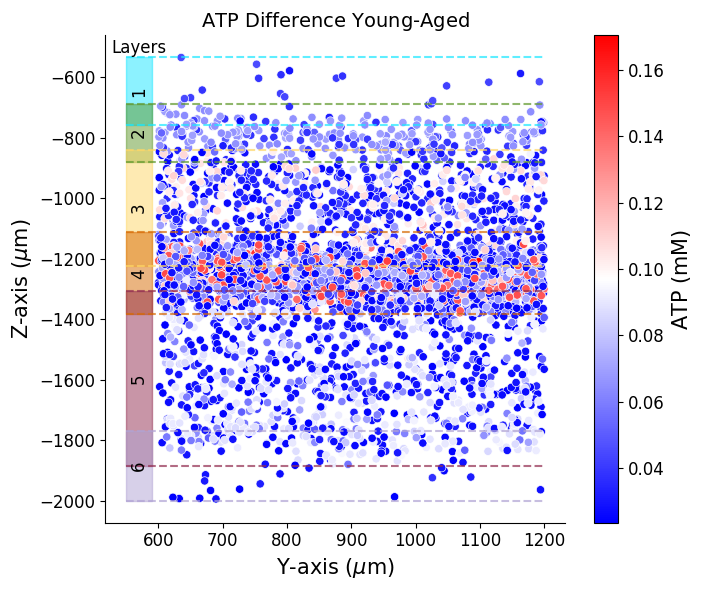

In [6]:
# Create a figure with a single plot
fig, ax2 = plt.subplots(figsize=(7, 6))

layers = [6, 5, 4, 3, 2, 1]

# Add colored rectangles for each layer in the scatter plot
for layer, color in color_layer.items():
    layer_data = df[df['layer'] == layer]
    if not layer_data.empty:
        # Calculate min and max for z for the current layer
        z_min, z_max = layer_data['z'].min(), layer_data['z'].max()
        
        # Create a rectangle to represent the layer color
        rect = patches.Rectangle((550, z_min), 40, z_max - z_min, 
                                 color=color, alpha=0.5)
        ax2.add_patch(rect)
        if layer ==1:
            # Add 'Layers' text on top of the rectangle
            ax2.text(570, z_max + 1., 'Layers', color='black', fontsize=12, ha='center', va='bottom')
        
        
        # Add 'Layers' text inside the rectangle
        ax2.text(570, (z_min + z_max) / 2, layer, 
                 color='black', fontsize=12, ha='center', va='center',
                 rotation=90)  # Rotate text for better alignment
# Add 'Layers' text inside the rectangle

    
c_pal = 'bwr'

# Scatter plot with the ATP difference colormap
scatter_plot = sns.scatterplot(x='y', y='z', hue='ATP difference', 
                               data=df[df['ATP difference'] > 0.1],
                               palette=c_pal,  # Color palette for ATP difference
                               ax=ax2,  # Use the main axes
                               legend=False)

# Add horizontal lines at each layer boundary on the scatter plot
for layer in layers:
    layer_data = df[df['layer'] == layer]
    if not layer_data.empty:
        z_min, z_max = layer_data['z'].min(), layer_data['z'].max()
        
        # Plot a horizontal line at the z_min of each layer
        ax2.hlines(z_min, xmin=550, xmax=1200, 
                   color=color_layer[layer], linestyle='--', linewidth=1.5, alpha=0.7)
        # Plot a horizontal line at the z_min of each layer
        ax2.hlines(z_max, xmin=550, xmax=1200, 
                   color=color_layer[layer], linestyle='--', linewidth=1.5, alpha=0.7)
        
# Add a color bar for the ATP Difference below the x-axis label
norm = plt.Normalize(df['ATP difference'].min(), df['ATP difference'].max())
sm = plt.cm.ScalarMappable(cmap=c_pal, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax2)
cbar.set_label('$\mathrm{ATP}$ (mM)', fontsize=15)
cbar.ax.set_position([0.15, 0.1, 0.7, 0.03])  # Adjust color bar position here
cbar.ax.tick_params(labelsize=12)

# Customize the scatter plot
ax2.set_xlabel('Y-axis ($\mu$m)', fontsize=15)
ax2.set_ylabel('Z-axis ($\mu$m)', fontsize=15)
ax2.set_title('$\mathrm{ATP}$ Difference Young-Aged', fontsize=14)
ax2.spines[['right', 'top']].set_visible(False)

ax2.tick_params(axis='both', labelsize=12)

# Show the plot
plt.tight_layout()
#plt.savefig("./RESULTS/Figure5b.pdf", format="pdf", bbox_inches='tight')
plt.show()

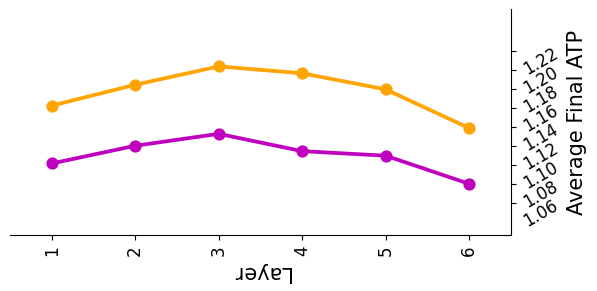

In [7]:
df['age_group'] = 'Young'  # Assign age group 'Young' for average ATP
df_aged = df.copy()  # Create a copy for aged individuals
df_aged['age_group'] = 'Aged'  # Assign age group 'Aged'

# Combine the young and aged datasets
combined_df = pd.concat([df[['layer', 'final avg ATP', 'age_group']], 
                          df_aged[['layer', 'final avg ATP aged', 'age_group']].rename(columns={'final avg ATP aged': 'final avg ATP'})], 
                          ignore_index=True)

# Group by 'layer' and 'age_group', and calculate the average of 'final avg ATP'
avg_df = combined_df.groupby(['layer', 'age_group'], as_index=False)['final avg ATP'].mean()

# Create the catplot with the averaged data
g = sns.catplot(x='layer', y='final avg ATP', hue='age_group', 
                data=avg_df, kind='point', palette=age_palette, height=3, aspect=2, legend=False)

# Customize the plot
g.set_axis_labels('Layer', 'Average Final ATP',fontsize=15)

#g.set_titles('Average Final ATP by Layer and Age Group',fontsize=12)
g.set_xticklabels(rotation=90)
g.set_yticklabels(rotation=30)
g.set(ylim=(avg_df['final avg ATP'].min() * 0.95, avg_df['final avg ATP'].max() * 1.05))  # Add padding to y-limits
g.tight_layout()

# Move the y-axis to the right
for ax in g.axes.flat:  # Iterate through each subplot axis
    ax.yaxis.tick_right()  # Move ticks to the right side
    ax.yaxis.set_label_position("right")  # Move the y-label to the right side

# Rotate the x-axis label by 180 degrees
for ax in g.axes.flat:
    ax.set_xlabel('Layer', fontsize=15, rotation=180)
ax.spines[['right']].set_visible(True)
ax.spines[['left']].set_visible(False)
ax.tick_params(axis='both', labelsize=12)

fig.tight_layout()
#plt.savefig("./RESULTS/Figure5a.pdf", format="pdf", bbox_inches='tight')

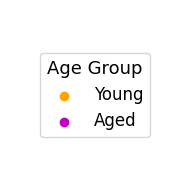

In [8]:
# Define colors and labels for the legend
legend_labels = ['Young', 'Aged']
legend_colors = [ color_met, color_aged]

# Create a separate legend
fig_legend = plt.figure(figsize=(2, 2))  # Set size for the legend figure
for color, label in zip(legend_colors, legend_labels):
    plt.scatter([], [], color=color, label=label)  # Create empty scatter for legend handles
plt.legend(title='Age Group', fontsize=12, title_fontsize='13', loc='center')  # Place legend in the center
plt.axis('off')  # Turn off the axis
plt.tight_layout()  # Adjust layout
#fig_legend.savefig('RESULTS/legend-5a.pdf')  # Save the legend as PDF

In [9]:
# # Create a figure with two subplots sharing the same y-axis
# fig = plt.figure(figsize=(7, 6))
# gs = fig.add_gridspec(1, 2, width_ratios=[0.05, 1])  # Thinner left plot

# # Create axes for the two subplots
# ax1 = fig.add_subplot(gs[0])  # Rectangles
# ax2 = fig.add_subplot(gs[1])  # Scatter plot

# # Plot for the rectangles
# layers = [6, 5, 4, 3, 2, 1]
# for layer in layers:
#     layer_data = df[df['layer'] == layer]
#     if not layer_data.empty:
#         # Calculate min and max for z
#         z_min, z_max = layer_data['z'].min(), layer_data['z'].max()
        
#         # Create a rectangle to highlight the area
#         rect = patches.Rectangle((0, z_min), 2, z_max - z_min, 
#                                  color=color_layer[layer], alpha=0.5)
#         ax1.add_patch(rect)
        
#         # Add text label for the layer
#         ax1.text(2.05, (z_min + z_max) / 2, f'{layer}', 
#                  verticalalignment='center', fontsize=12, color='black')

# # Customize the first plot (rectangles)
# ax1.set_xlim(-0.5, 1.5)  # Set x limits to center the rectangle
# ax1.set_ylim(df['z'].min() - 1, df['z'].max() + 1)  # Adjust y limits to show all rectangles
# ax1.axis('off')  # Remove axes
# ax1.set_title('Layers')

# c_pal = 'bwr'
# # Scatter plot
# scatter_plot = sns.scatterplot(x='y', y='z', hue='ATP difference', 
#                                data=df[df['ATP difference']>0.1],
#                                palette=c_pal,  # Color palette showing positive and negative differences
#                                ax=ax2,  # Use the second axes
#                                legend=False)

# # Add a color bar for the ATP Difference below the x-axis label
# norm = plt.Normalize(df['ATP difference'].min(), df['ATP difference'].max())
# sm = plt.cm.ScalarMappable(cmap=c_pal, norm=norm)
# sm.set_array([])
# cbar = plt.colorbar(sm, ax=ax2)
# cbar.set_label('$\mathrm{ATP}$ (mM))', fontsize=15)
# cbar.ax.set_position([0.15, 0.1, 0.7, 0.03])  # Adjust color bar position here
# cbar.ax.tick_params(labelsize=12)

# # Add colored rectangles for each layer in the scatter plot
# for layer, color in color_layer.items():
#     layer_data = df[df['layer'] == layer]
#     if not layer_data.empty:
#         # Calculate min and max for z for the current layer
#         z_min, z_max = layer_data['z'].min(), layer_data['z'].max()
        
#         # Create a rectangle to represent the layer color
#         rect = patches.Rectangle((0, z_min), 0.1, z_max - z_min, 
#                                  color=color, alpha=0.5)
#         ax2.add_patch(rect)

# # Customize the scatter plot
# ax2.set_xlabel('Y-axis ($\mu$m)', fontsize=15)
# ax2.set_ylabel('Z-axis ($\mu$m)', fontsize=15)
# ax2.set_title('$\mathrm{ATP}$ Difference Young-Aged', fontsize=14)
# ax2.spines[['right', 'top']].set_visible(False)

# ax2.tick_params(axis='both', labelsize=12)

# # Show the plot
# plt.tight_layout()

In [10]:
# Data Folder can be downloaded from 10.5281/zenodo.14187063
file_path = './Data/spikes_ndam_met_aged.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

In [11]:
# Columns representing the spike counts
spike_columns = ['spikes_ndam', 'spikes_met', 'spikes_aged']
spike_sums_layer = df.groupby('layer')[spike_columns].sum()

In [12]:
print('total spike ndam','total spike Young','total spike Aged')
spike_sums_layer['spikes_ndam'].sum(), spike_sums_layer['spikes_met'].sum(), spike_sums_layer['spikes_aged'].sum()

total spike ndam total spike Young total spike Aged


(14640, 16893, 17135)

In [13]:
print('avg ATP ndam','avg ATP Young','avg ATP Aged')
1.38, avg_df[avg_df.age_group=='Young']['final avg ATP'].mean(), avg_df[avg_df.age_group=='Aged']['final avg ATP'].mean()

avg ATP ndam avg ATP Young avg ATP Aged


(1.38, 1.1772477809169144, 1.10948817142095)